<a href="https://colab.research.google.com/github/ishanshah10/Concepts-and-Technologies-of-AI/blob/main/2461793_Ishan_Bikram_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment I - Statistical Interpretation & EDA of HDI Dataset

Course: Concepts and Technologies of AI (5CS037)

Student: Ishan Bikram Shah (2461793)


In [ ]:
#  Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

#  Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Human_Development_Index_Dataset.csv', encoding="ISO-8859-1")


print("Columns:", df.columns.tolist())

Columns: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)


In [ ]:
# Task 1: Filter for 2022
hdi_2022_df = df[df['year'] == 2022].copy()

# Task 2: Basic Exploration
print(hdi_2022_df.head(10))
print("Shape:", hdi_2022_df.shape)
print("Column Types:\n", hdi_2022_df.dtypes)

# Task 3: Data Cleaning
print("Missing Values:\n", hdi_2022_df.isnull().sum())

# Convert numeric columns
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce')
hdi_2022_df['life_expectancy'] = pd.to_numeric(hdi_2022_df['life_expectancy'], errors='coerce')

# Clean country names
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

# Drop duplicates and missing
hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(inplace=True)

# Task 4: Statistics
print("Mean HDI:", hdi_2022_df['hdi'].mean())
print("Median HDI:", hdi_2022_df['hdi'].median())
print("Std Dev HDI:", hdi_2022_df['hdi'].std())

print("Highest HDI:\n", hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()])
print("Lowest HDI:\n", hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()])

# Task 5: Filter and Sorting HDI
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
top10_gni = high_hdi.sort_values(by="gross_inc_percap", ascending=False).head(10)
print("Top 10 Countries by GNI:\n", top10_gni)

# Task 6: Add HDI Category
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)


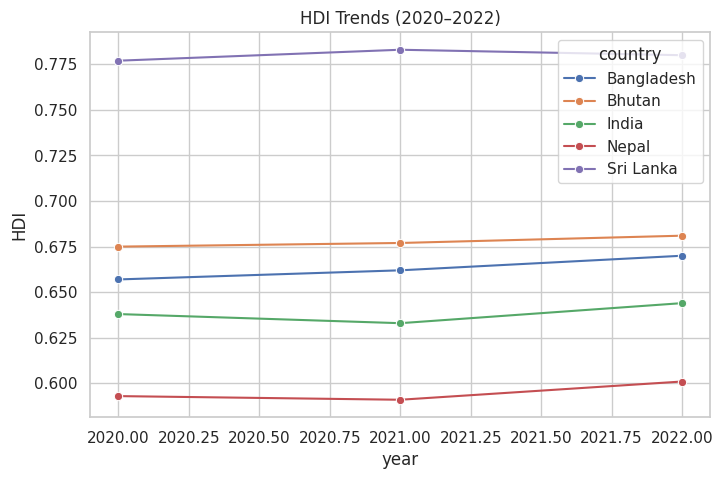

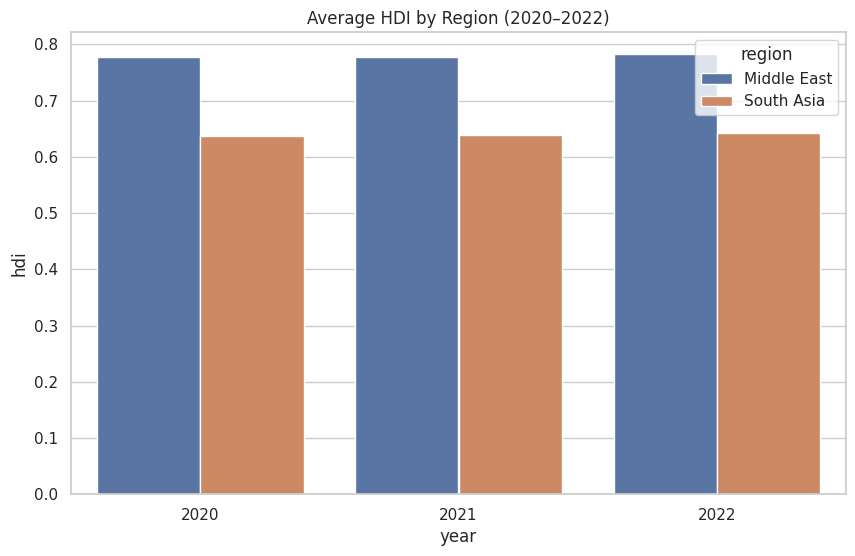

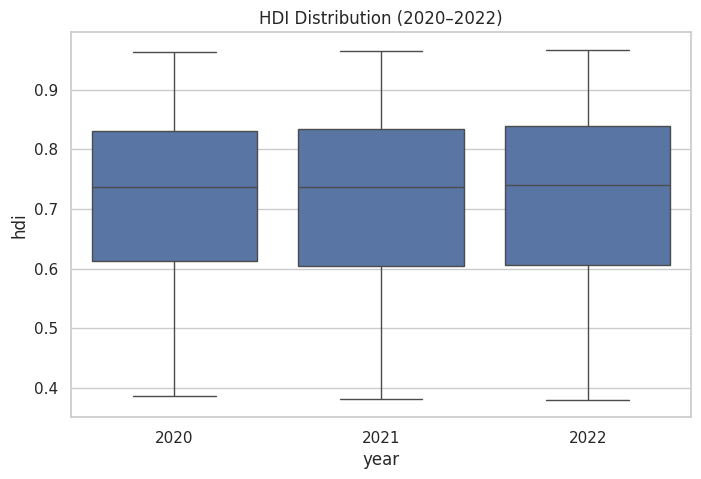

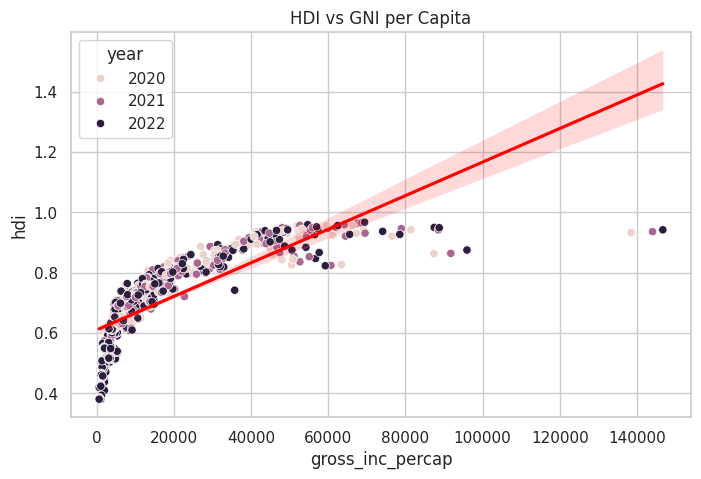

In [ ]:
# Task 1: Filter for 2020–2022
hdi_trend = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_trend.to_csv("HDI_problem1B.csv", index=False)

# Task 2: Clean
hdi_trend.drop_duplicates(inplace=True)
hdi_trend.dropna(subset=['hdi', 'country', 'year'], inplace=True)

# Task 3A: Line Chart for 5 Countries
countries = ["Nepal", "India", "Bangladesh", "Bhutan", "Sri Lanka"]
subset = hdi_trend[hdi_trend['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=subset, x="year", y="hdi", hue="country", marker="o")
plt.title("HDI Trends (2020–2022)")
plt.ylabel("HDI")
plt.show()

# Task 3B: Add Region Manually
region_map = {
    "Nepal": "South Asia", "India": "South Asia", "Bangladesh": "South Asia",
    "Bhutan": "South Asia", "Sri Lanka": "South Asia", "Maldives": "South Asia",
    "Pakistan": "South Asia", "Afghanistan": "South Asia",
    "Qatar": "Middle East", "Saudi Arabia": "Middle East", "Iran": "Middle East",
    "Iraq": "Middle East", "Israel": "Middle East", "Jordan": "Middle East",
    "Kuwait": "Middle East", "Lebanon": "Middle East", "Oman": "Middle East",
    "Palestine": "Middle East", "Syria": "Middle East",
    "United Arab Emirates": "Middle East", "Yemen": "Middle East"
}
hdi_trend['region'] = hdi_trend['country'].map(region_map)

# Bar Chart: Average HDI by Region
region_avg = hdi_trend.groupby(['region', 'year'])['hdi'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x="year", y="hdi", hue="region")
plt.title("Average HDI by Region (2020–2022)")
plt.show()

# Box Plot: HDI Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=hdi_trend, x="year", y="hdi")
plt.title("HDI Distribution (2020–2022)")
plt.show()

# Scatter Plot: HDI vs GNI
plt.figure(figsize=(8,5))
sns.scatterplot(data=hdi_trend, x="gross_inc_percap", y="hdi", hue="year")
sns.regplot(data=hdi_trend, x="gross_inc_percap", y="hdi", scatter=False, color="red")
plt.title("HDI vs GNI per Capita")
plt.show()

Problem 2 - Advanced HDI Exploration (South Asia)


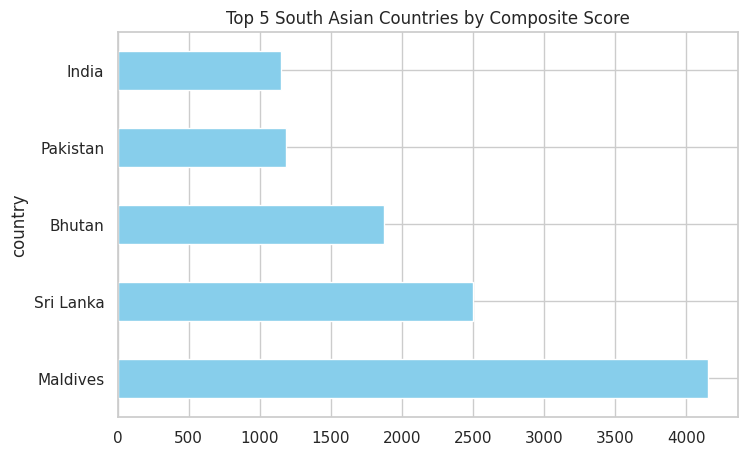

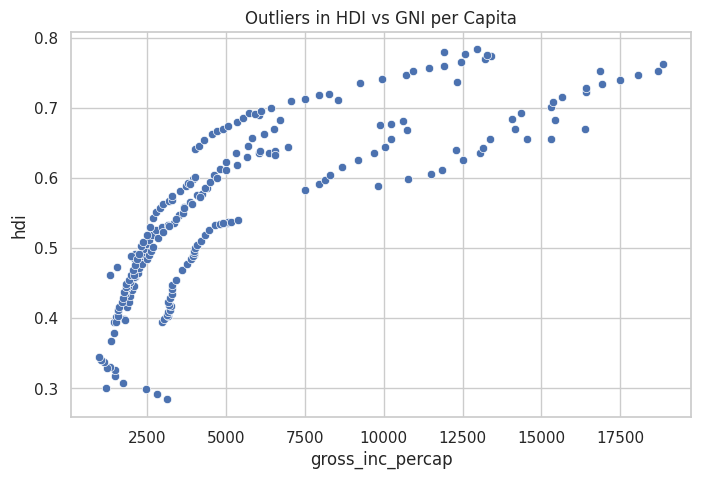

Correlation with Gender Development: 0.865621005012754
Correlation with Life Expectancy: 0.9587610559043978


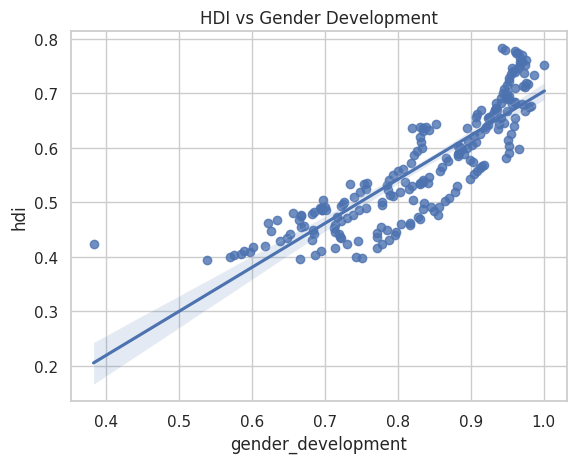

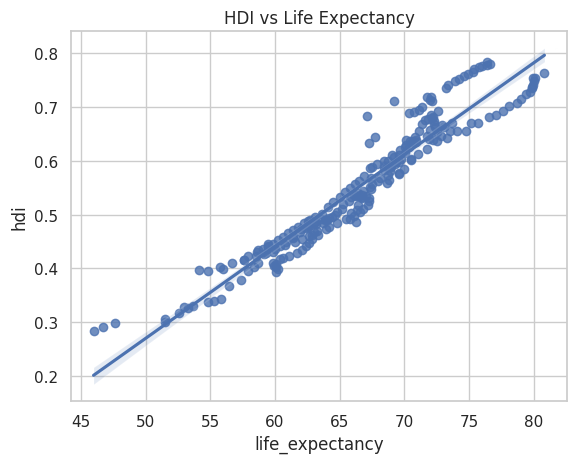

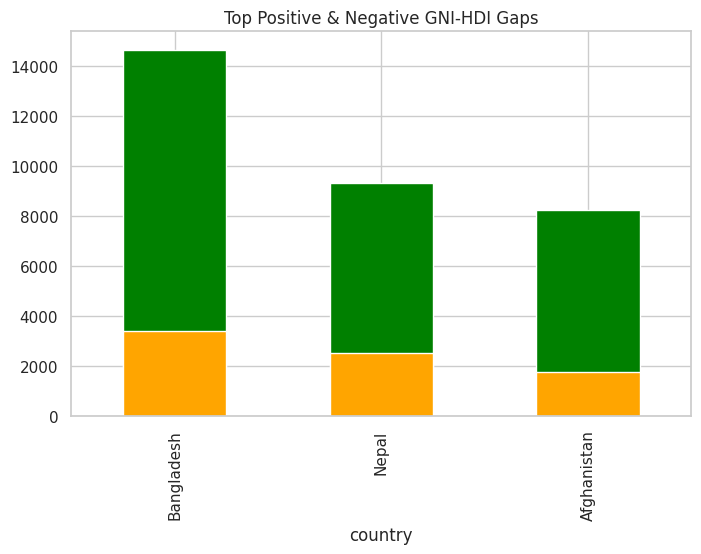

In [ ]:
# Task 1: South Asia Subset
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
south_df = df[df['country'].isin(south_asia)].copy()
south_df.to_csv("HDI_SouthAsia.csv", index=False)

# Task 2: Composite Score
south_df['Composite_Score'] = 0.30*south_df['life_expectancy'] + 0.30*south_df['gross_inc_percap']
ranked = south_df.groupby('country')['Composite_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
ranked.head(5).plot(kind='barh', color="skyblue")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()

# Task 3: Outlier Detection
Q1 = south_df['hdi'].quantile(0.25)
Q3 = south_df['hdi'].quantile(0.75)
IQR = Q3 - Q1
outliers = south_df[(south_df['hdi'] < Q1 - 1.5*IQR) | (south_df['hdi'] > Q3 + 1.5*IQR)]

plt.figure(figsize=(8,5))
sns.scatterplot(data=south_df, x="gross_inc_percap", y="hdi")
sns.scatterplot(data=outliers, x="gross_inc_percap", y="hdi", color="red", label="Outliers")
plt.title("Outliers in HDI vs GNI per Capita")
plt.show()

# Task 4: Metric Relationships
print("Correlation with Gender Development:", south_df['gender_development'].corr(south_df['hdi']))
print("Correlation with Life Expectancy:", south_df['life_expectancy'].corr(south_df['hdi']))

sns.regplot(data=south_df, x="gender_development", y="hdi")
plt.title("HDI vs Gender Development")
plt.show()

sns.regplot(data=south_df, x="life_expectancy", y="hdi")
plt.title("HDI vs Life Expectancy")
plt.show()

# Task 5: Gap Analysis
south_df['GNI_HDI_Gap'] = south_df['gross_inc_percap'] - south_df['hdi']
gap_rank = south_df.groupby('country')['GNI_HDI_Gap'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
gap_rank.head(3).plot(kind='bar', color="green")
gap_rank.tail(3).plot(kind='bar', color="orange")
plt.title("Top Positive & Negative GNI-HDI Gaps")
plt.show()

Problem 3: Comparative Regional Analysis (South Asia vs Middle East)

South Asia Mean HDI: 0.6395833333333333 Std: 0.09827331747496995
Middle East Mean HDI: 0.7889090909090909 Std: 0.14129476362297624


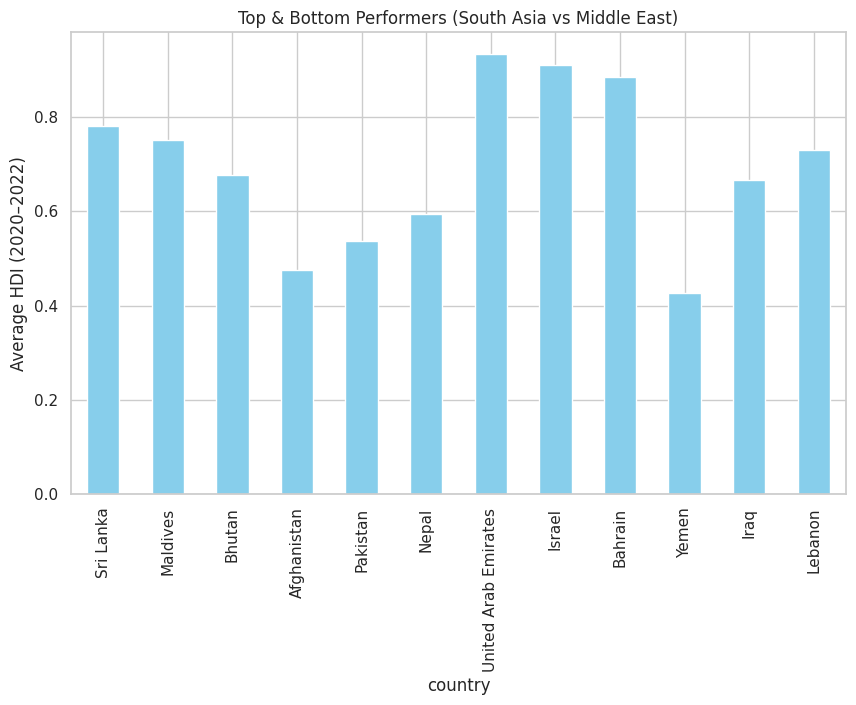

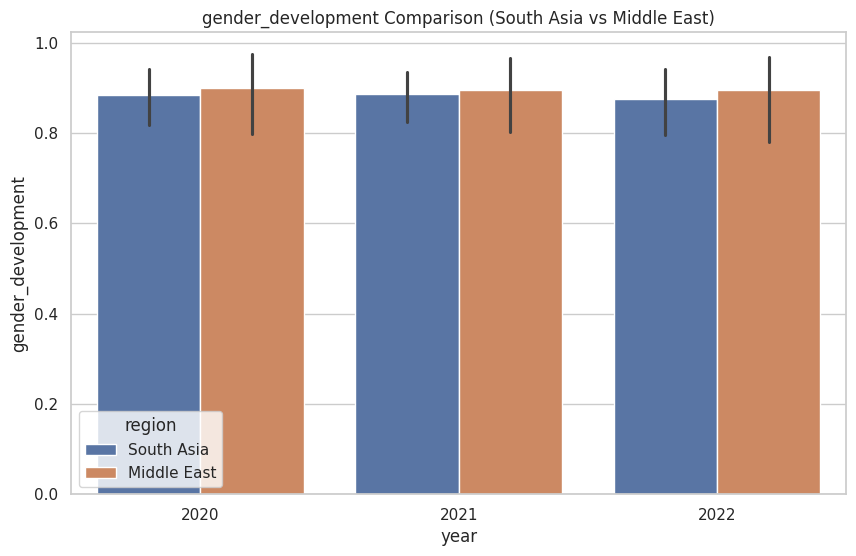

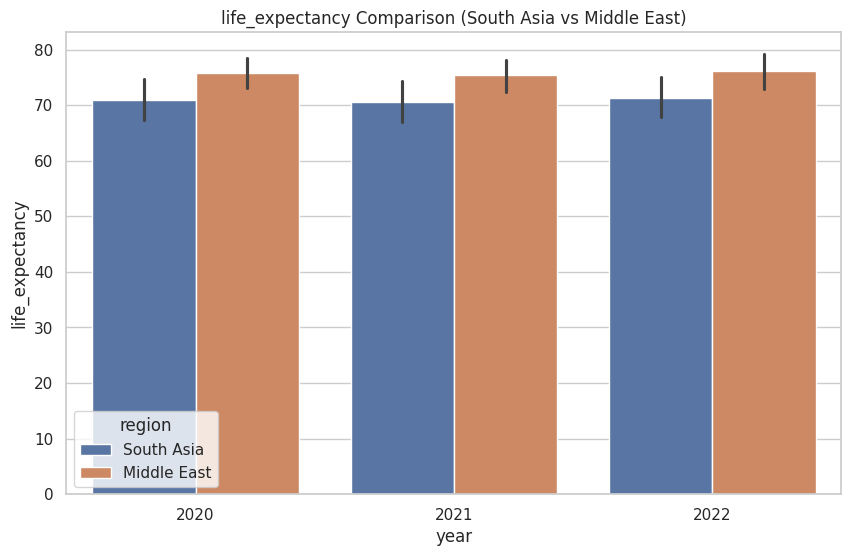

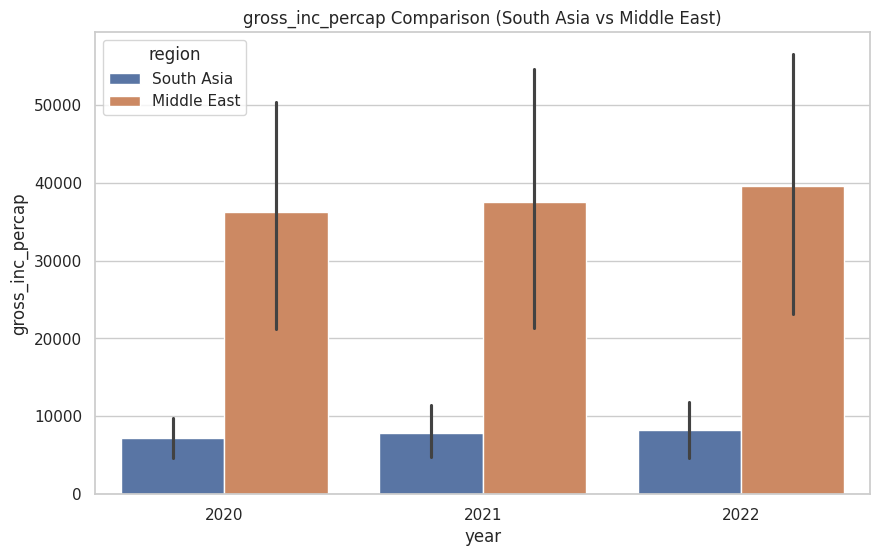

South Asia HDI Range: 0.321 CV: 0.1536520924690084
Middle East HDI Range: 0.5130000000000001 CV: 0.17910145193048382
South Asia Correlation (HDI vs Gender Development): 0.8742177004831327
South Asia Correlation (HDI vs Life Expectancy): 0.9387641385416623


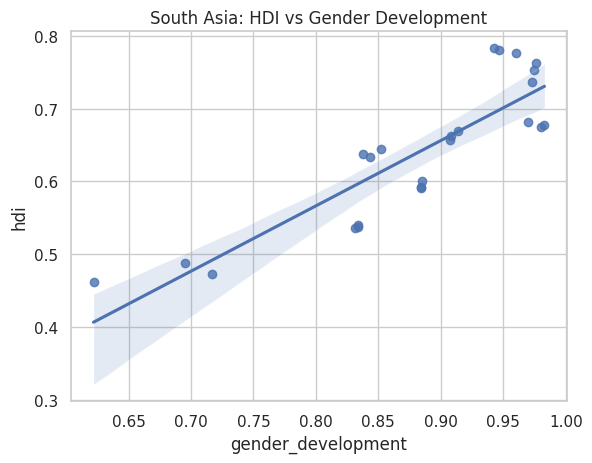

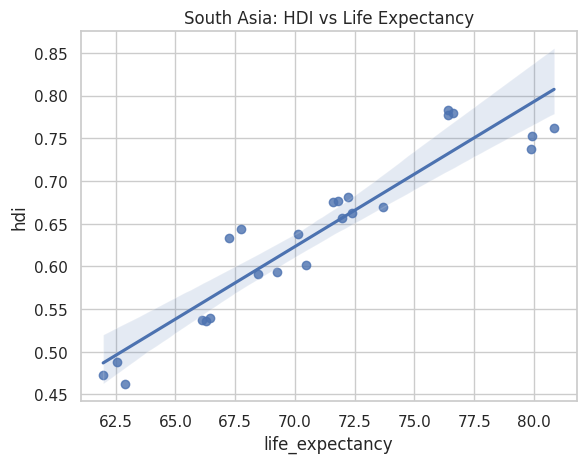

Middle East Correlation (HDI vs Gender Development): 0.9356697525724119
Middle East Correlation (HDI vs Life Expectancy): 0.9331227568940162


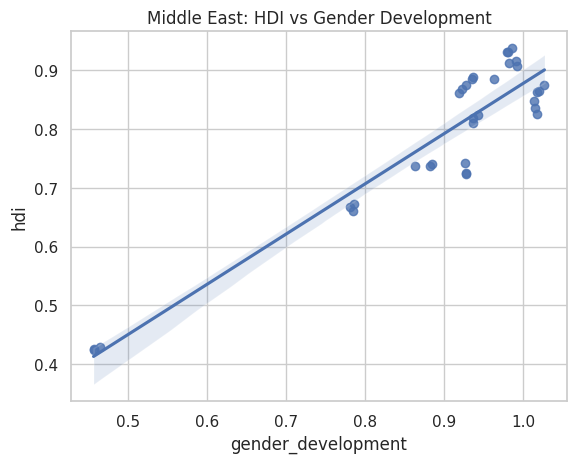

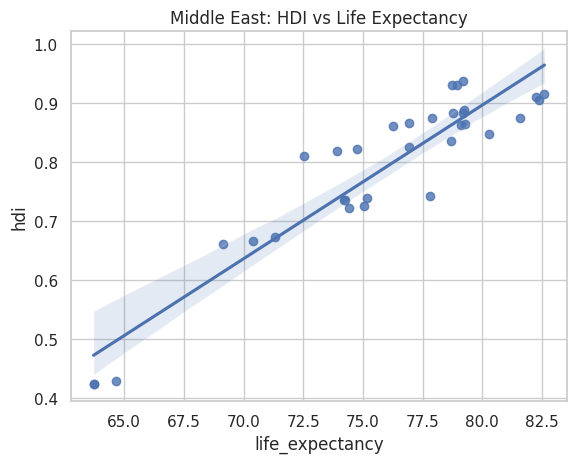

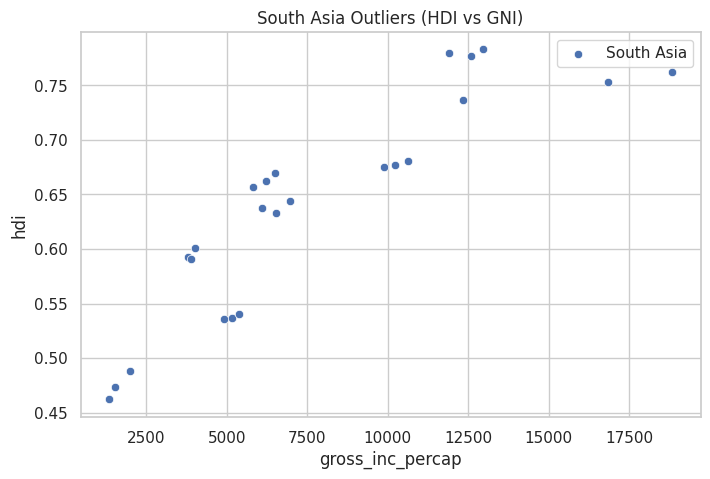

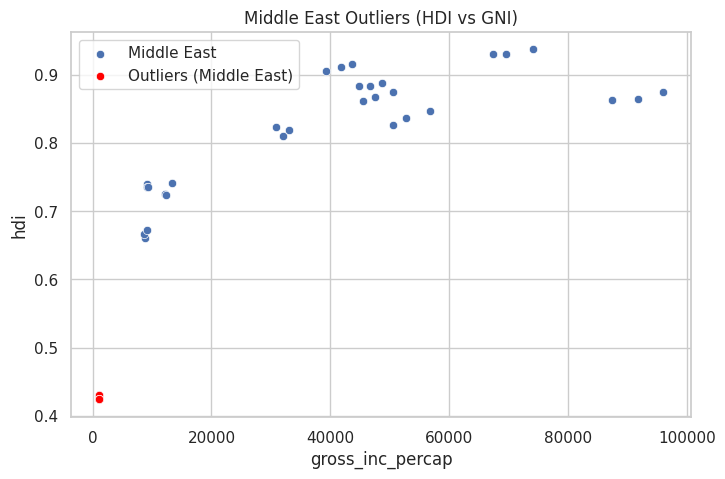

In [ ]:


# Task 1: Create Subsets
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman","Palestine",
               "Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

# Use the 2020–2022 dataset from Problem 1B
hdi_trend = df[df['year'].isin([2020, 2021, 2022])].copy()

south_df = hdi_trend[hdi_trend['country'].isin(south_asia)].copy()
me_df = hdi_trend[hdi_trend['country'].isin(middle_east)].copy()

south_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

# Task 2: Descriptive Statistics
print("South Asia Mean HDI:", south_df['hdi'].mean(), "Std:", south_df['hdi'].std())
print("Middle East Mean HDI:", me_df['hdi'].mean(), "Std:", me_df['hdi'].std())

# Task 3: Top and Bottom Performers
top_south = south_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_south = south_df.groupby('country')['hdi'].mean().sort_values().head(3)

top_me = me_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom_me = me_df.groupby('country')['hdi'].mean().sort_values().head(3)

plt.figure(figsize=(10,6))
pd.concat([top_south, bottom_south, top_me, bottom_me]).plot(kind='bar', color="skyblue")
plt.title("Top & Bottom Performers (South Asia vs Middle East)")
plt.ylabel("Average HDI (2020–2022)")
plt.show()

# Task 4: Metric Comparisons
metrics = ['gender_development','life_expectancy','gross_inc_percap']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(data=pd.concat([south_df.assign(region="South Asia"),
                                me_df.assign(region="Middle East")]),
                x="year", y=metric, hue="region")
    plt.title(f"{metric} Comparison (South Asia vs Middle East)")
    plt.show()

# Task 5: HDI Disparity
range_south = south_df['hdi'].max() - south_df['hdi'].min()
range_me = me_df['hdi'].max() - me_df['hdi'].min()

cv_south = south_df['hdi'].std() / south_df['hdi'].mean()
cv_me = me_df['hdi'].std() / me_df['hdi'].mean()

print("South Asia HDI Range:", range_south, "CV:", cv_south)
print("Middle East HDI Range:", range_me, "CV:", cv_me)

# Task 6: Correlation Analysis
for region_df, region_name in [(south_df, "South Asia"), (me_df, "Middle East")]:
    corr_gender = region_df['hdi'].corr(region_df['gender_development'])
    corr_life = region_df['hdi'].corr(region_df['life_expectancy'])
    print(f"{region_name} Correlation (HDI vs Gender Development):", corr_gender)
    print(f"{region_name} Correlation (HDI vs Life Expectancy):", corr_life)

    sns.regplot(data=region_df, x="gender_development", y="hdi")
    plt.title(f"{region_name}: HDI vs Gender Development")
    plt.show()

    sns.regplot(data=region_df, x="life_expectancy", y="hdi")
    plt.title(f"{region_name}: HDI vs Life Expectancy")
    plt.show()

# Task 7: Outlier Detection
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]

outliers_south = detect_outliers(south_df, 'hdi')
outliers_me = detect_outliers(me_df, 'hdi')

plt.figure(figsize=(8,5))
sns.scatterplot(data=south_df, x="gross_inc_percap", y="hdi", label="South Asia")
sns.scatterplot(data=outliers_south, x="gross_inc_percap", y="hdi", color="red", label="Outliers (South Asia)")
plt.title("South Asia Outliers (HDI vs GNI)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=me_df, x="gross_inc_percap", y="hdi", label="Middle East")
sns.scatterplot(data=outliers_me, x="gross_inc_percap", y="hdi", color="red", label="Outliers (Middle East)")
plt.title("Middle East Outliers (HDI vs GNI)")
plt.show()